Train various models on the following data source of data [link text](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)

Train various machine learning models such as:


1.   Logistic Regression
2.   Decision Tree
3.   Naive Bayes
4.   Linear SVC



Now read one tweet from 15 differnet news agency and try to put them into one of 4 categories (Business, Technology, Entertainment, medicine) using various models

#Reading and preparing data

In [ ]:
import pandas as pd
import numpy as np

source of data [link text](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Text Mining/Twitter/uci-news-aggregator.csv',encoding='latin-1')

(b = business, t = science and technology, e = entertainment, m = health)

In [ ]:
df[2100:2110]

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
2100,2101,NSA Whistleblower Edward Snowden: Keep Their H...,http://readwrite.com/2014/03/10/edward-snowden...,ReadWrite,t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,readwrite.com,1394513149036
2101,2102,Edward Snowden Tells SXSW He'd Leak Those Secr...,http://kplu.org/post/edward-snowden-tells-sxsw...,KPLU News for Seattle and the Northwest,t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,kplu.org,1394513149255
2102,2103,The security vs. privacy debate is already ove...,http://washingtonexaminer.com/the-security-vs....,Washington Examiner,t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,washingtonexaminer.com,1394513149407
2103,2104,"Snowden at SXSW: ""Would I do it again? Absolut...",http://www.philly.com/philly/blogs/inthemix/Sn...,Philly.com \(blog\),t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,www.philly.com,1394513149592
2104,2105,Snowden to tech leaders: 'We need you to help us',http://www.upi.com/Top_News/US/2014/03/10/Snow...,UPI.com,t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,www.upi.com,1394513149784
2105,2106,Edward Snowden at SXSW: Encryption is the answ...,http://www.digitaltrends.com/web/edward-snowde...,Digital Trends,t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,www.digitaltrends.com,1394513149970
2106,2107,Edward Snowden at SXSW: 'Absolutely' no regrets,http://metronews.ca/news/world/967201/edward-s...,MetroNews Canada,t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,metronews.ca,1394513150229
2107,2108,How to Use Edward Snowden's Three Tips for Dig...,http://stream.wsj.com/story/latest-headlines/S...,Wall Street Journal,t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,stream.wsj.com,1394513150406
2108,2109,Whistleblower Snowden Brings Message to SXSW,http://www.woai.com/articles/woai-local-news-s...,WOAI.com,t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,www.woai.com,1394513150615
2109,2110,Edward Snowden: Tech Giants Are Irresponsible ...,http://www.adweek.com/news/technology/edward-s...,Adweek,t,dqvpqdCv-IV7KrMD51wr0w-O_QIeM,www.adweek.com,1394513150776


In [ ]:
df.tail(1)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
422418,422937,Phoenix boy undergoes surgery to repair throat...,http://www.cbs3springfield.com/story/26368078/...,WSHM-TV,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.cbs3springfield.com,1409229191565


In [ ]:
df2 = df.apply(lambda x : True
            if x['CATEGORY'] == 'b' else False, axis = 1) 
  
# Count number of True in the series 
num_rows = len(df2[df2 == True].index) 
  
print('Total business article : ', 
      num_rows ) 

Total business article :  115967


In [ ]:
df2 = df.apply(lambda x : True
            if x['CATEGORY'] == 't' else False, axis = 1) 
  
# Count number of True in the series 
num_rows = len(df2[df2 == True].index) 
  
print('Total science and tech article : ', 
      num_rows ) 

Total science and tech article :  108344


In [ ]:
df2 = df.apply(lambda x : True
            if x['CATEGORY'] == 'e' else False, axis = 1) 
  
# Count number of True in the series 
num_rows = len(df2[df2 == True].index) 
  
print('Total entertainment article: ', 
      num_rows ) 

Total entertainment article:  152469


In [ ]:
df2 = df.apply(lambda x : True
            if x['CATEGORY'] == 'm' else False, axis = 1) 
  
# Count number of True in the series 
num_rows = len(df2[df2 == True].index) 
  
print('Total medical article: ', 
      num_rows ) 

Total medical article:  45639


In [ ]:
df3 = df[['TITLE','CATEGORY']]

In [ ]:
df3.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [ ]:
category_no = []
for row in df3['CATEGORY']:
    if row == 'b':    category_no.append(0)
    elif row == 't':  category_no.append(1)
    elif row == 'e':  category_no.append(2)
    elif row == 'm':  category_no.append(3)
    
    else:           category_no.append('Not_Rated')
        
# Creating a column from the list
df3['category_no'] = category_no

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df3.head()

,TITLE,CATEGORY,category_no
0,"Fed official says weak data caused by weather,...",b,0
1,Fed's Charles Plosser sees high bar for change...,b,0
2,US open: Stocks fall after Fed official hints ...,b,0
3,"Fed risks falling 'behind the curve', Charles ...",b,0
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,0


In [ ]:
df3.tail()

,TITLE,CATEGORY,category_no
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,3
422415,Boy to have surgery on esophagus after battery...,m,3
422416,Child who swallowed battery to have reconstruc...,m,3
422417,Phoenix boy undergoes surgery to repair throat...,m,3
422418,Phoenix boy undergoes surgery to repair throat...,m,3


#Making Machine learning models

***Train test split***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df3['TITLE'],df3['category_no'],random_state=0)

***Vectorizing***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5,ngram_range=(1,3)).fit(X_train)
len(vect.get_feature_names())
X_train_vectorized = vect.transform(X_train)

***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

model = LogisticRegression()
model.fit(X_train_vectorized,y_train)
predictions = model.predict(vect.transform(X_test))
accuracy = model.score(vect.transform(X_test), y_test) 
print(accuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9486672032574215


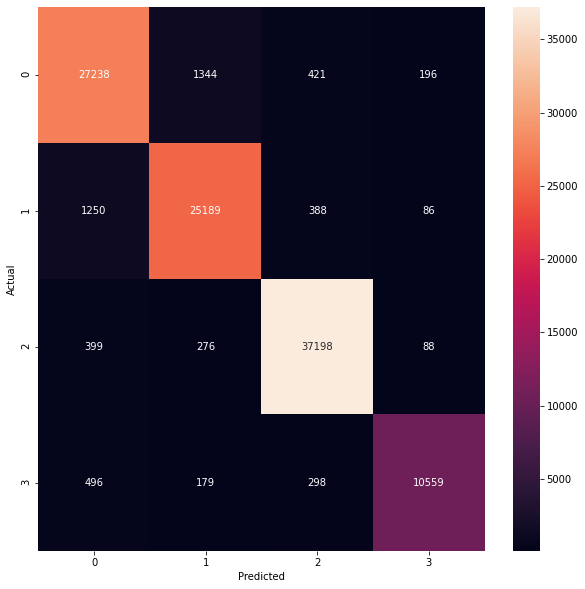

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

***DecisionTreeClassifier***

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train_vectorized,y_train) 

predictions = dtree_model.predict(vect.transform(X_test))
accuracy = dtree_model.score(vect.transform(X_test), y_test) 
print(accuracy)

0.4346385114341177


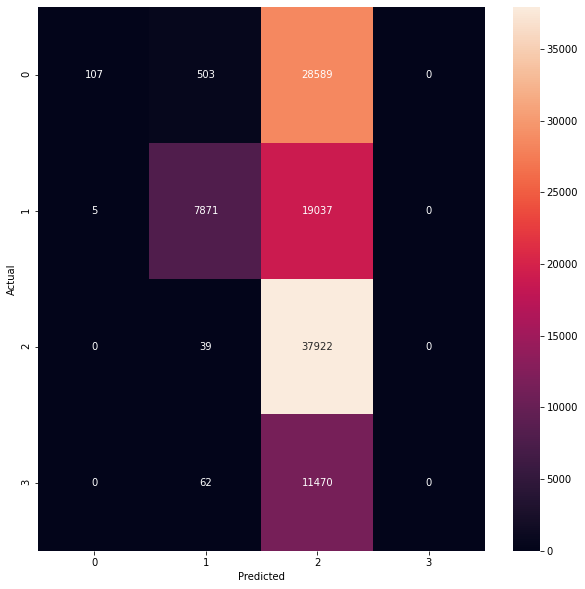

In [ ]:

cm = confusion_matrix(y_test,predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

***MultinomialNB***

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB().fit(X_train_vectorized,y_train)
nb_predictions = nb_model.predict(vect.transform(X_test)) 
accuracy = nb_model.score(vect.transform(X_test), y_test) 
print(accuracy)

0.9342644761138204


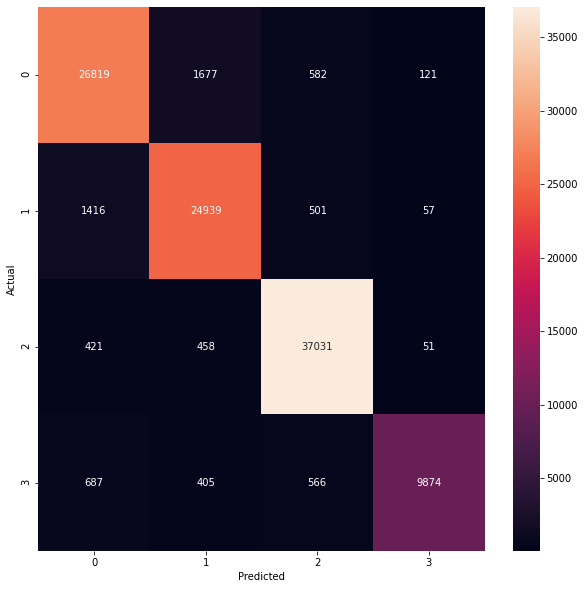

In [ ]:

cm = confusion_matrix(y_test,nb_predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

***Support Vector Machine***

In [ ]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC().fit(X_train_vectorized,y_train)
svc_predictions = svc_model.predict(vect.transform(X_test)) 
accuracy = svc_model.score(vect.transform(X_test), y_test) 
print(accuracy)


0.9562520713981345


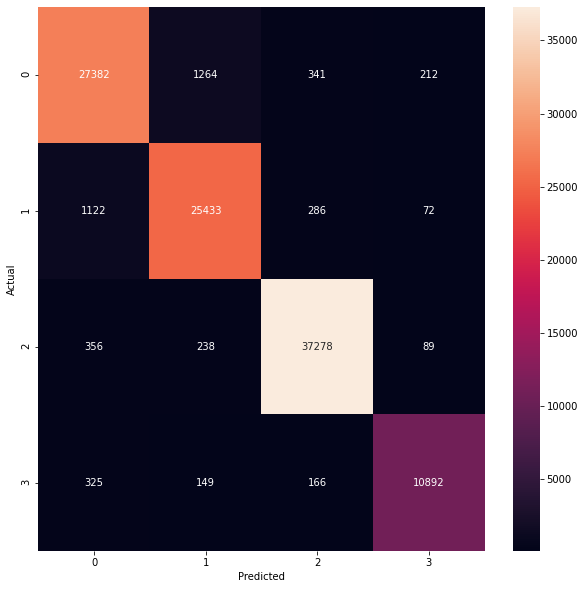

In [ ]:
cm = confusion_matrix(y_test,svc_predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Extracting news from twitter and predicting

In [ ]:
import tweepy

In [ ]:
import csv
reader = csv.reader(open('/content/drive/MyDrive/Colab Notebooks/Text Mining/Twitter/key.csv', 'r'))
d = {}
for row in reader:
   k, v = row
   d[k] = v

In [ ]:
# Creating the authentication object
auth = tweepy.OAuthHandler(d['C_KEY'],d['C_SECRET'])
# Setting your access token and secret
auth.set_access_token(d['A_TOKEN'], d['A_SECRET'])
# Creating the API object while passing in auth information
api = tweepy.API(auth)

In [ ]:
news_agency = ["Reuters","pacificbiznews","enews","WIRED","MTVNEWS","ReutersScience","SkySports","YourAnonNews","NDTVProfit","medical_xpress","mnt","wwos","Sport24news","gmanews","TheHackersNews"]

In [ ]:
len(news_agency)

15

***Prediction Using Logistic Regression***

In [ ]:
df = df = pd.DataFrame(columns = ['News_agency', 'Tweet','Logistic_R','NB','SVC']) 

In [ ]:
#df['News_agency'] = np.array(news_agency)

In [ ]:
df.head()

,News_agency,Tweet,Logistic_R,NB,SVC


In [ ]:
agency = []
tweets = []
LR = []
NB = []
SVC = []

In [ ]:
for name in news_agency:
  # Number of tweets to pull
  tweetCount = 2

  # Calling the user_timeline function with our parameters
  results = api.user_timeline(id=name, count=tweetCount)

  # foreach through all tweets pulled
  for tweet in results:
    # printing the text stored inside the tweet object
    tweets.append(tweet.text)
    agency.append(name)
    
    prediction1 = model.predict(vect.transform([tweet.text]))
    if(prediction1[0]==0):
      output1 = 'Business'
    elif(prediction1[0]==1):
      output1 = 'Technology'
    elif(prediction1[0]==2):
      output1 = 'Entertainment'
    else:
      output1 = 'Medicine'
    LR.append(output1)
    

    prediction2 = nb_model.predict(vect.transform([tweet.text]))
    if(prediction2[0]==0):
      output2 = 'Business'
    elif(prediction2[0]==1):
      output2 = 'Technology'
    elif(prediction2[0]==2):
      output2 = 'Entertainment'
    else:
      output2 = 'Medicine'
      
    NB.append(output2)


    prediction3 = svc_model.predict(vect.transform([tweet.text]))
    if(prediction3[0]==0):
      output3 = 'Business'
    elif(prediction3[0]==1):
      output3 = 'Technology'
    elif(prediction3[0]==2):
      output3 = 'Entertainment'
    else:
      output3 = 'Medicine'
    SVC.append(output3)
      

In [ ]:
df.head()

,News_agency,Tweet,Logistic_R,NB,SVC


In [ ]:
df['News_agency'] = np.array(agency)
df['Tweet'] = np.array(tweets)
df['Logistic_R'] = np.array(LR)
df['NB'] = np.array(NB)
df['SVC'] = np.array(SVC)

In [ ]:
df

,News_agency,Tweet,Logistic_R,NB,SVC
0,Reuters,"Hong Kong hikes share trading tax, bourse's st...",Business,Business,Business
1,Reuters,Upbeat German data lifts European shares; Puma...,Business,Business,Business
2,pacificbiznews,"For the full year, Matson reported net income ...",Business,Business,Business
3,pacificbiznews,The change will happen at 12:01 a.m. on Thursd...,Entertainment,Technology,Entertainment
4,enews,"Inside Clare Crawley and Dale Moss' ""Plans for...",Business,Entertainment,Entertainment
5,enews,Nicola Coughlan Makes a Very Bridgerton-Inspir...,Entertainment,Entertainment,Entertainment
6,WIRED,You don't need to spend an arm and a leg to pl...,Technology,Technology,Entertainment
7,WIRED,"“In roughly three decades, the global populati...",Business,Technology,Technology
8,MTVNEWS,RT @ziggymarley: .@maluma speaks on our collab...,Entertainment,Technology,Entertainment
9,MTVNEWS,.@Dometi_ asked young Black lawmakers what mot...,Business,Business,Business
